In [1]:
!git clone 'https://github.com/aakashvardhan/s9-advanced-conv-data-aug.git'

Cloning into 's9-advanced-conv-data-aug'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (220/220), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 220 (delta 148), reused 133 (delta 61), pack-reused 0
Receiving objects: 100% (220/220), 252.25 KiB | 1.34 MiB/s, done.
Resolving deltas: 100% (148/148), done.


In [2]:
import sys
sys.path.append('/content/s9-advanced-conv-data-aug')
sys.path.append('/content/s9-advanced-conv-data-aug/models')

In [3]:
from config import get_config
config = get_config()
from main import main

In [4]:
config['epochs'] = 100
config['n_channels'] = 36
config['batch_size'] = 128
config['lr_scheduler'] = 'plateau'
# config['step_size'] = 10
config['lr'] = 0.01

In [5]:
model, test_loader, lr = main(config)

CUDA Available? True


100%|██████████| 170498071/170498071 [00:03<00:00, 42775265.67it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 18, 32, 32]           2,646
            Conv2d-2           [-1, 18, 32, 32]           2,646
       BatchNorm2d-3           [-1, 18, 32, 32]              36
              ReLU-4           [-1, 18, 32, 32]               0
           Dropout-5           [-1, 18, 32, 32]               0
         ConvBlock-6           [-1, 18, 32, 32]               0
            Conv2d-7           [-1, 18, 32, 32]           2,916
            Conv2d-8           [-1, 18, 32, 32]           2,916
       BatchNorm2d-9           [-1, 18, 32, 32]              36
             ReLU-10           [-1, 18, 32, 32]               0
          Dropout-11           [-1, 18, 32, 32]               0
        ConvBlock-12           [-1, 18, 32, 32]               0
           Conv2d-13           [-1, 36, 28, 28]           5,832
           Conv2d-14           [-1, 36,

Loss=1.6692695617675781 Batch_id=390 Accuracy=31.22: 100%|██████████| 391/391 [00:14<00:00, 26.11it/s]



Test set: Average loss: 1.6667, Accuracy: 4052/10000 (40.52%)

Learning rate: 0.04
EPOCH: 2


Loss=1.538365125656128 Batch_id=390 Accuracy=42.13: 100%|██████████| 391/391 [00:14<00:00, 27.65it/s]



Test set: Average loss: 1.4413, Accuracy: 4746/10000 (47.46%)

Learning rate: 0.04
EPOCH: 3


Loss=1.537400722503662 Batch_id=390 Accuracy=46.27: 100%|██████████| 391/391 [00:14<00:00, 26.97it/s]



Test set: Average loss: 1.4006, Accuracy: 4893/10000 (48.93%)

Learning rate: 0.04
EPOCH: 4


Loss=1.325585126876831 Batch_id=390 Accuracy=50.09: 100%|██████████| 391/391 [00:14<00:00, 26.95it/s]



Test set: Average loss: 1.1853, Accuracy: 5659/10000 (56.59%)

Learning rate: 0.04
EPOCH: 5


Loss=1.1479049921035767 Batch_id=390 Accuracy=54.00: 100%|██████████| 391/391 [00:14<00:00, 27.35it/s]



Test set: Average loss: 1.1080, Accuracy: 6010/10000 (60.10%)

Learning rate: 0.04
EPOCH: 6


Loss=1.0764302015304565 Batch_id=390 Accuracy=56.52: 100%|██████████| 391/391 [00:14<00:00, 27.39it/s]



Test set: Average loss: 1.0518, Accuracy: 6283/10000 (62.83%)

Learning rate: 0.04
EPOCH: 7


Loss=1.0531541109085083 Batch_id=390 Accuracy=59.08: 100%|██████████| 391/391 [00:14<00:00, 27.36it/s]



Test set: Average loss: 0.9286, Accuracy: 6741/10000 (67.41%)

Learning rate: 0.04
EPOCH: 8


Loss=1.1351717710494995 Batch_id=390 Accuracy=61.07: 100%|██████████| 391/391 [00:14<00:00, 26.69it/s]



Test set: Average loss: 0.8961, Accuracy: 6808/10000 (68.08%)

Learning rate: 0.04
EPOCH: 9


Loss=1.0398824214935303 Batch_id=390 Accuracy=62.51: 100%|██████████| 391/391 [00:14<00:00, 27.24it/s]



Test set: Average loss: 0.8895, Accuracy: 6922/10000 (69.22%)

Learning rate: 0.04
EPOCH: 10


Loss=1.0811952352523804 Batch_id=390 Accuracy=63.72: 100%|██████████| 391/391 [00:14<00:00, 27.10it/s]



Test set: Average loss: 0.8854, Accuracy: 6892/10000 (68.92%)

Learning rate: 0.04
EPOCH: 11


Loss=1.168561577796936 Batch_id=390 Accuracy=64.61: 100%|██████████| 391/391 [00:14<00:00, 27.16it/s]



Test set: Average loss: 0.8180, Accuracy: 7110/10000 (71.10%)

Learning rate: 0.04
EPOCH: 12


Loss=0.982934296131134 Batch_id=390 Accuracy=65.60: 100%|██████████| 391/391 [00:14<00:00, 26.91it/s]



Test set: Average loss: 0.7878, Accuracy: 7241/10000 (72.41%)

Learning rate: 0.04
EPOCH: 13


Loss=1.0033971071243286 Batch_id=390 Accuracy=66.04: 100%|██████████| 391/391 [00:14<00:00, 27.19it/s]



Test set: Average loss: 0.7915, Accuracy: 7240/10000 (72.40%)

Learning rate: 0.04
EPOCH: 14


Loss=1.0404856204986572 Batch_id=390 Accuracy=66.94: 100%|██████████| 391/391 [00:14<00:00, 27.13it/s]



Test set: Average loss: 0.7454, Accuracy: 7348/10000 (73.48%)

Learning rate: 0.04
EPOCH: 15


Loss=0.7799140214920044 Batch_id=390 Accuracy=67.60: 100%|██████████| 391/391 [00:14<00:00, 27.17it/s]



Test set: Average loss: 0.7521, Accuracy: 7376/10000 (73.76%)

Learning rate: 0.04
EPOCH: 16


Loss=0.8009332418441772 Batch_id=390 Accuracy=67.99: 100%|██████████| 391/391 [00:14<00:00, 27.01it/s]



Test set: Average loss: 0.7711, Accuracy: 7306/10000 (73.06%)

Learning rate: 0.04
EPOCH: 17


Loss=0.7926600575447083 Batch_id=390 Accuracy=68.52: 100%|██████████| 391/391 [00:14<00:00, 26.37it/s]



Test set: Average loss: 0.7953, Accuracy: 7220/10000 (72.20%)

Learning rate: 0.04
EPOCH: 18


Loss=0.9676157236099243 Batch_id=390 Accuracy=68.75: 100%|██████████| 391/391 [00:14<00:00, 27.02it/s]



Test set: Average loss: 0.7194, Accuracy: 7489/10000 (74.89%)

Learning rate: 0.04
EPOCH: 19


Loss=0.7954180836677551 Batch_id=390 Accuracy=69.15: 100%|██████████| 391/391 [00:14<00:00, 27.09it/s]



Test set: Average loss: 0.7141, Accuracy: 7483/10000 (74.83%)

Learning rate: 0.04
EPOCH: 20


Loss=0.8384982943534851 Batch_id=390 Accuracy=69.82: 100%|██████████| 391/391 [00:14<00:00, 26.78it/s]



Test set: Average loss: 0.7101, Accuracy: 7527/10000 (75.27%)

Learning rate: 0.04
EPOCH: 21


Loss=1.1838617324829102 Batch_id=390 Accuracy=70.34: 100%|██████████| 391/391 [00:14<00:00, 26.19it/s]



Test set: Average loss: 0.6924, Accuracy: 7602/10000 (76.02%)

Learning rate: 0.04
EPOCH: 22


Loss=1.0823442935943604 Batch_id=390 Accuracy=70.96: 100%|██████████| 391/391 [00:14<00:00, 26.92it/s]



Test set: Average loss: 0.7255, Accuracy: 7470/10000 (74.70%)

Learning rate: 0.04
EPOCH: 23


Loss=1.0400766134262085 Batch_id=390 Accuracy=70.76: 100%|██████████| 391/391 [00:14<00:00, 26.61it/s]



Test set: Average loss: 0.6737, Accuracy: 7641/10000 (76.41%)

Learning rate: 0.04
EPOCH: 24


Loss=0.9637404680252075 Batch_id=390 Accuracy=71.17: 100%|██████████| 391/391 [00:14<00:00, 26.80it/s]



Test set: Average loss: 0.7732, Accuracy: 7343/10000 (73.43%)

Learning rate: 0.04
EPOCH: 25


Loss=1.0495023727416992 Batch_id=390 Accuracy=71.22: 100%|██████████| 391/391 [00:14<00:00, 26.13it/s]



Test set: Average loss: 0.6861, Accuracy: 7633/10000 (76.33%)

Learning rate: 0.04
EPOCH: 26


Loss=0.8924557566642761 Batch_id=390 Accuracy=71.74: 100%|██████████| 391/391 [00:14<00:00, 26.76it/s]



Test set: Average loss: 0.6511, Accuracy: 7742/10000 (77.42%)

Learning rate: 0.04
EPOCH: 27


Loss=0.8459309339523315 Batch_id=390 Accuracy=72.03: 100%|██████████| 391/391 [00:14<00:00, 26.70it/s]



Test set: Average loss: 0.7153, Accuracy: 7584/10000 (75.84%)

Learning rate: 0.04
EPOCH: 28


Loss=0.6568981409072876 Batch_id=390 Accuracy=72.51: 100%|██████████| 391/391 [00:14<00:00, 27.14it/s]



Test set: Average loss: 0.6325, Accuracy: 7764/10000 (77.64%)

Learning rate: 0.04
EPOCH: 29


Loss=0.8834357261657715 Batch_id=390 Accuracy=72.47: 100%|██████████| 391/391 [00:14<00:00, 27.16it/s]



Test set: Average loss: 0.6464, Accuracy: 7786/10000 (77.86%)

Learning rate: 0.04
EPOCH: 30


Loss=0.6544159650802612 Batch_id=390 Accuracy=73.08: 100%|██████████| 391/391 [00:14<00:00, 26.87it/s]



Test set: Average loss: 0.6658, Accuracy: 7676/10000 (76.76%)

Learning rate: 0.04
EPOCH: 31


Loss=0.6797009706497192 Batch_id=390 Accuracy=72.77: 100%|██████████| 391/391 [00:14<00:00, 27.10it/s]



Test set: Average loss: 0.6422, Accuracy: 7796/10000 (77.96%)

Learning rate: 0.04
EPOCH: 32


Loss=0.8789747953414917 Batch_id=390 Accuracy=73.30: 100%|██████████| 391/391 [00:14<00:00, 27.27it/s]



Test set: Average loss: 0.6306, Accuracy: 7792/10000 (77.92%)

Learning rate: 0.04
EPOCH: 33


Loss=0.5463211536407471 Batch_id=390 Accuracy=73.50: 100%|██████████| 391/391 [00:14<00:00, 27.24it/s]



Test set: Average loss: 0.6421, Accuracy: 7747/10000 (77.47%)

Learning rate: 0.04
EPOCH: 34


Loss=0.8401357531547546 Batch_id=390 Accuracy=73.68: 100%|██████████| 391/391 [00:14<00:00, 26.11it/s]



Test set: Average loss: 0.6225, Accuracy: 7879/10000 (78.79%)

Learning rate: 0.04
EPOCH: 35


Loss=0.6210209727287292 Batch_id=390 Accuracy=73.71: 100%|██████████| 391/391 [00:14<00:00, 27.15it/s]



Test set: Average loss: 0.6108, Accuracy: 7883/10000 (78.83%)

Learning rate: 0.04
EPOCH: 36


Loss=0.8467408418655396 Batch_id=390 Accuracy=74.05: 100%|██████████| 391/391 [00:14<00:00, 26.97it/s]



Test set: Average loss: 0.5962, Accuracy: 7947/10000 (79.47%)

Learning rate: 0.04
EPOCH: 37


Loss=0.7440544962882996 Batch_id=390 Accuracy=74.14: 100%|██████████| 391/391 [00:14<00:00, 26.95it/s]



Test set: Average loss: 0.5936, Accuracy: 7967/10000 (79.67%)

Learning rate: 0.04
EPOCH: 38


Loss=0.752215564250946 Batch_id=390 Accuracy=74.38: 100%|██████████| 391/391 [00:14<00:00, 26.51it/s]



Test set: Average loss: 0.5926, Accuracy: 7953/10000 (79.53%)

Learning rate: 0.04
EPOCH: 39


Loss=0.5767941474914551 Batch_id=390 Accuracy=74.69: 100%|██████████| 391/391 [00:14<00:00, 26.99it/s]



Test set: Average loss: 0.6260, Accuracy: 7820/10000 (78.20%)

Learning rate: 0.04
EPOCH: 40


Loss=0.6523444056510925 Batch_id=390 Accuracy=74.69: 100%|██████████| 391/391 [00:14<00:00, 27.18it/s]



Test set: Average loss: 0.5870, Accuracy: 7947/10000 (79.47%)

Learning rate: 0.04
EPOCH: 41


Loss=0.5114054083824158 Batch_id=390 Accuracy=74.68: 100%|██████████| 391/391 [00:14<00:00, 27.11it/s]



Test set: Average loss: 0.5913, Accuracy: 7959/10000 (79.59%)

Learning rate: 0.04
EPOCH: 42


Loss=0.614904522895813 Batch_id=390 Accuracy=75.22: 100%|██████████| 391/391 [00:14<00:00, 27.11it/s]



Test set: Average loss: 0.5974, Accuracy: 7914/10000 (79.14%)

Learning rate: 0.04
EPOCH: 43


Loss=0.8026002645492554 Batch_id=390 Accuracy=75.36: 100%|██████████| 391/391 [00:14<00:00, 26.56it/s]



Test set: Average loss: 0.6534, Accuracy: 7841/10000 (78.41%)

Learning rate: 0.04
EPOCH: 44


Loss=0.8199902772903442 Batch_id=390 Accuracy=75.16: 100%|██████████| 391/391 [00:14<00:00, 27.10it/s]



Test set: Average loss: 0.6356, Accuracy: 7826/10000 (78.26%)

Learning rate: 0.04
EPOCH: 45


Loss=0.7388745546340942 Batch_id=390 Accuracy=75.71: 100%|██████████| 391/391 [00:14<00:00, 26.92it/s]



Test set: Average loss: 0.5741, Accuracy: 8033/10000 (80.33%)

Learning rate: 0.04
EPOCH: 46


Loss=0.7439035177230835 Batch_id=390 Accuracy=75.68: 100%|██████████| 391/391 [00:14<00:00, 27.01it/s]



Test set: Average loss: 0.6256, Accuracy: 7848/10000 (78.48%)

Learning rate: 0.04
EPOCH: 47


Loss=0.8279369473457336 Batch_id=390 Accuracy=75.59: 100%|██████████| 391/391 [00:15<00:00, 25.85it/s]



Test set: Average loss: 0.5771, Accuracy: 8003/10000 (80.03%)

Learning rate: 0.04
EPOCH: 48


Loss=0.6193779706954956 Batch_id=390 Accuracy=75.71: 100%|██████████| 391/391 [00:14<00:00, 26.85it/s]



Test set: Average loss: 0.5707, Accuracy: 8045/10000 (80.45%)

Learning rate: 0.04
EPOCH: 49


Loss=0.7822198867797852 Batch_id=390 Accuracy=75.82: 100%|██████████| 391/391 [00:14<00:00, 27.13it/s]



Test set: Average loss: 0.6108, Accuracy: 7929/10000 (79.29%)

Learning rate: 0.04
EPOCH: 50


Loss=0.6161612868309021 Batch_id=390 Accuracy=75.95: 100%|██████████| 391/391 [00:14<00:00, 26.83it/s]



Test set: Average loss: 0.5496, Accuracy: 8085/10000 (80.85%)

Learning rate: 0.04
EPOCH: 51


Loss=0.6795770525932312 Batch_id=390 Accuracy=76.36: 100%|██████████| 391/391 [00:14<00:00, 26.77it/s]



Test set: Average loss: 0.5506, Accuracy: 8054/10000 (80.54%)

Learning rate: 0.04
EPOCH: 52


Loss=0.7328153848648071 Batch_id=390 Accuracy=76.37: 100%|██████████| 391/391 [00:14<00:00, 27.11it/s]



Test set: Average loss: 0.5585, Accuracy: 8083/10000 (80.83%)

Learning rate: 0.04
EPOCH: 53


Loss=0.6632371544837952 Batch_id=390 Accuracy=76.46: 100%|██████████| 391/391 [00:14<00:00, 27.10it/s]



Test set: Average loss: 0.5838, Accuracy: 8018/10000 (80.18%)

Learning rate: 0.04
EPOCH: 54


Loss=0.5806257128715515 Batch_id=390 Accuracy=76.52: 100%|██████████| 391/391 [00:14<00:00, 27.04it/s]



Test set: Average loss: 0.5561, Accuracy: 8091/10000 (80.91%)

Learning rate: 0.04
EPOCH: 55


Loss=0.8259174227714539 Batch_id=390 Accuracy=76.38: 100%|██████████| 391/391 [00:14<00:00, 26.93it/s]



Test set: Average loss: 0.5420, Accuracy: 8136/10000 (81.36%)

Learning rate: 0.04
EPOCH: 56


Loss=0.6328089237213135 Batch_id=390 Accuracy=76.66: 100%|██████████| 391/391 [00:14<00:00, 26.46it/s]



Test set: Average loss: 0.5620, Accuracy: 8111/10000 (81.11%)

Learning rate: 0.04
EPOCH: 57


Loss=0.659151017665863 Batch_id=390 Accuracy=76.63: 100%|██████████| 391/391 [00:14<00:00, 27.05it/s]



Test set: Average loss: 0.6697, Accuracy: 7810/10000 (78.10%)

Learning rate: 0.04
EPOCH: 58


Loss=0.7060537934303284 Batch_id=390 Accuracy=76.76: 100%|██████████| 391/391 [00:14<00:00, 26.91it/s]



Test set: Average loss: 0.5203, Accuracy: 8212/10000 (82.12%)

Learning rate: 0.04
EPOCH: 59


Loss=0.7252084016799927 Batch_id=390 Accuracy=77.11: 100%|██████████| 391/391 [00:14<00:00, 26.98it/s]



Test set: Average loss: 0.5488, Accuracy: 8140/10000 (81.40%)

Learning rate: 0.04
EPOCH: 60


Loss=1.0457491874694824 Batch_id=390 Accuracy=77.20: 100%|██████████| 391/391 [00:15<00:00, 25.81it/s]



Test set: Average loss: 0.5396, Accuracy: 8146/10000 (81.46%)

Learning rate: 0.04
EPOCH: 61


Loss=0.5533989071846008 Batch_id=390 Accuracy=77.03: 100%|██████████| 391/391 [00:14<00:00, 26.83it/s]



Test set: Average loss: 0.5512, Accuracy: 8117/10000 (81.17%)

Learning rate: 0.04
EPOCH: 62


Loss=0.7538261413574219 Batch_id=390 Accuracy=77.28: 100%|██████████| 391/391 [00:14<00:00, 27.06it/s]



Test set: Average loss: 0.5277, Accuracy: 8168/10000 (81.68%)

Learning rate: 0.04
EPOCH: 63


Loss=0.4472849369049072 Batch_id=390 Accuracy=77.49: 100%|██████████| 391/391 [00:14<00:00, 26.77it/s]



Test set: Average loss: 0.5219, Accuracy: 8216/10000 (82.16%)

Learning rate: 0.04
EPOCH: 64


Loss=0.6764658689498901 Batch_id=390 Accuracy=77.50: 100%|██████████| 391/391 [00:15<00:00, 25.97it/s]



Test set: Average loss: 0.5409, Accuracy: 8134/10000 (81.34%)

Learning rate: 0.002
EPOCH: 65


Loss=0.3709605634212494 Batch_id=390 Accuracy=78.83: 100%|██████████| 391/391 [00:14<00:00, 26.45it/s]



Test set: Average loss: 0.4844, Accuracy: 8309/10000 (83.09%)

Learning rate: 0.002
EPOCH: 66


Loss=0.6771870851516724 Batch_id=390 Accuracy=79.39: 100%|██████████| 391/391 [00:14<00:00, 26.67it/s]



Test set: Average loss: 0.4838, Accuracy: 8312/10000 (83.12%)

Learning rate: 0.002
EPOCH: 67


Loss=0.6889507174491882 Batch_id=390 Accuracy=79.60: 100%|██████████| 391/391 [00:14<00:00, 26.56it/s]



Test set: Average loss: 0.4820, Accuracy: 8304/10000 (83.04%)

Learning rate: 0.002
EPOCH: 68


Loss=0.5643353462219238 Batch_id=390 Accuracy=79.72: 100%|██████████| 391/391 [00:14<00:00, 26.31it/s]



Test set: Average loss: 0.4824, Accuracy: 8317/10000 (83.17%)

Learning rate: 0.002
EPOCH: 69


Loss=0.4805677831172943 Batch_id=390 Accuracy=79.69: 100%|██████████| 391/391 [00:14<00:00, 26.98it/s]



Test set: Average loss: 0.4829, Accuracy: 8318/10000 (83.18%)

Learning rate: 0.002
EPOCH: 70


Loss=0.4792642593383789 Batch_id=390 Accuracy=79.89: 100%|██████████| 391/391 [00:14<00:00, 27.16it/s]



Test set: Average loss: 0.4762, Accuracy: 8331/10000 (83.31%)

Learning rate: 0.002
EPOCH: 71


Loss=0.6489982604980469 Batch_id=390 Accuracy=79.81: 100%|██████████| 391/391 [00:14<00:00, 27.07it/s]



Test set: Average loss: 0.4797, Accuracy: 8331/10000 (83.31%)

Learning rate: 0.002
EPOCH: 72


Loss=0.559559166431427 Batch_id=390 Accuracy=79.82: 100%|██████████| 391/391 [00:14<00:00, 26.48it/s]



Test set: Average loss: 0.4737, Accuracy: 8362/10000 (83.62%)

Learning rate: 0.002
EPOCH: 73


Loss=0.4832061231136322 Batch_id=390 Accuracy=79.70: 100%|██████████| 391/391 [00:14<00:00, 26.69it/s]



Test set: Average loss: 0.4763, Accuracy: 8365/10000 (83.65%)

Learning rate: 0.002
EPOCH: 74


Loss=0.3672258257865906 Batch_id=390 Accuracy=79.91: 100%|██████████| 391/391 [00:14<00:00, 26.82it/s]



Test set: Average loss: 0.4728, Accuracy: 8360/10000 (83.60%)

Learning rate: 0.002
EPOCH: 75


Loss=0.6245788335800171 Batch_id=390 Accuracy=79.90: 100%|██████████| 391/391 [00:14<00:00, 26.51it/s]



Test set: Average loss: 0.4730, Accuracy: 8362/10000 (83.62%)

Learning rate: 0.002
EPOCH: 76


Loss=0.558735191822052 Batch_id=390 Accuracy=79.76: 100%|██████████| 391/391 [00:14<00:00, 26.55it/s]



Test set: Average loss: 0.4784, Accuracy: 8344/10000 (83.44%)

Learning rate: 0.002
EPOCH: 77


Loss=0.4780433773994446 Batch_id=390 Accuracy=80.14: 100%|██████████| 391/391 [00:14<00:00, 26.25it/s]



Test set: Average loss: 0.4699, Accuracy: 8380/10000 (83.80%)

Learning rate: 0.002
EPOCH: 78


Loss=0.7072524428367615 Batch_id=390 Accuracy=80.09: 100%|██████████| 391/391 [00:14<00:00, 26.78it/s]



Test set: Average loss: 0.4753, Accuracy: 8364/10000 (83.64%)

Learning rate: 0.002
EPOCH: 79


Loss=0.6197838187217712 Batch_id=390 Accuracy=79.79: 100%|██████████| 391/391 [00:14<00:00, 26.67it/s]



Test set: Average loss: 0.4757, Accuracy: 8358/10000 (83.58%)

Learning rate: 0.002
EPOCH: 80


Loss=0.45927533507347107 Batch_id=390 Accuracy=80.03: 100%|██████████| 391/391 [00:14<00:00, 26.08it/s]



Test set: Average loss: 0.4757, Accuracy: 8350/10000 (83.50%)

Learning rate: 0.002
EPOCH: 81


Loss=0.6567702889442444 Batch_id=390 Accuracy=79.86: 100%|██████████| 391/391 [00:14<00:00, 26.72it/s]



Test set: Average loss: 0.4769, Accuracy: 8354/10000 (83.54%)

Learning rate: 0.002
EPOCH: 82


Loss=0.5822422504425049 Batch_id=390 Accuracy=80.08: 100%|██████████| 391/391 [00:14<00:00, 27.01it/s]



Test set: Average loss: 0.4689, Accuracy: 8393/10000 (83.93%)

Learning rate: 0.002
EPOCH: 83


Loss=0.8211715817451477 Batch_id=390 Accuracy=79.96: 100%|██████████| 391/391 [00:14<00:00, 26.75it/s]



Test set: Average loss: 0.4736, Accuracy: 8361/10000 (83.61%)

Learning rate: 0.002
EPOCH: 84


Loss=0.6066104769706726 Batch_id=390 Accuracy=80.06: 100%|██████████| 391/391 [00:14<00:00, 26.22it/s]



Test set: Average loss: 0.4749, Accuracy: 8352/10000 (83.52%)

Learning rate: 0.002
EPOCH: 85


Loss=0.7338725924491882 Batch_id=390 Accuracy=80.10: 100%|██████████| 391/391 [00:14<00:00, 26.86it/s]



Test set: Average loss: 0.4691, Accuracy: 8388/10000 (83.88%)

Learning rate: 0.002
EPOCH: 86


Loss=0.5624563097953796 Batch_id=390 Accuracy=79.92: 100%|██████████| 391/391 [00:14<00:00, 26.94it/s]



Test set: Average loss: 0.4719, Accuracy: 8374/10000 (83.74%)

Learning rate: 0.002
EPOCH: 87


Loss=0.5562807321548462 Batch_id=390 Accuracy=80.16: 100%|██████████| 391/391 [00:14<00:00, 26.82it/s]



Test set: Average loss: 0.4696, Accuracy: 8379/10000 (83.79%)

Learning rate: 0.002
EPOCH: 88


Loss=0.3731834292411804 Batch_id=390 Accuracy=80.39: 100%|██████████| 391/391 [00:14<00:00, 26.52it/s]



Test set: Average loss: 0.4703, Accuracy: 8375/10000 (83.75%)

Learning rate: 0.0001
EPOCH: 89


Loss=0.5369698405265808 Batch_id=390 Accuracy=80.24: 100%|██████████| 391/391 [00:14<00:00, 26.84it/s]



Test set: Average loss: 0.4686, Accuracy: 8382/10000 (83.82%)

Learning rate: 0.0001
EPOCH: 90


Loss=0.5496894717216492 Batch_id=390 Accuracy=80.48: 100%|██████████| 391/391 [00:14<00:00, 26.77it/s]



Test set: Average loss: 0.4712, Accuracy: 8375/10000 (83.75%)

Learning rate: 0.0001
EPOCH: 91


Loss=0.5752062797546387 Batch_id=390 Accuracy=80.00: 100%|██████████| 391/391 [00:14<00:00, 26.93it/s]



Test set: Average loss: 0.4714, Accuracy: 8372/10000 (83.72%)

Learning rate: 0.0001
EPOCH: 92


Loss=0.40738487243652344 Batch_id=390 Accuracy=80.24: 100%|██████████| 391/391 [00:14<00:00, 26.80it/s]



Test set: Average loss: 0.4699, Accuracy: 8375/10000 (83.75%)

Learning rate: 0.0001
EPOCH: 93


Loss=0.5109667181968689 Batch_id=390 Accuracy=80.33: 100%|██████████| 391/391 [00:14<00:00, 27.03it/s]



Test set: Average loss: 0.4700, Accuracy: 8396/10000 (83.96%)

Learning rate: 0.0001
EPOCH: 94


Loss=0.6223009824752808 Batch_id=390 Accuracy=80.19: 100%|██████████| 391/391 [00:14<00:00, 26.66it/s]



Test set: Average loss: 0.4717, Accuracy: 8366/10000 (83.66%)

Learning rate: 0.0001
EPOCH: 95


Loss=0.500887930393219 Batch_id=390 Accuracy=80.21: 100%|██████████| 391/391 [00:14<00:00, 26.46it/s]



Test set: Average loss: 0.4702, Accuracy: 8377/10000 (83.77%)

Learning rate: 5e-06
EPOCH: 96


Loss=0.5024956464767456 Batch_id=390 Accuracy=80.38: 100%|██████████| 391/391 [00:14<00:00, 26.40it/s]



Test set: Average loss: 0.4715, Accuracy: 8370/10000 (83.70%)

Learning rate: 5e-06
EPOCH: 97


Loss=0.893354058265686 Batch_id=390 Accuracy=80.10: 100%|██████████| 391/391 [00:14<00:00, 26.88it/s]



Test set: Average loss: 0.4723, Accuracy: 8373/10000 (83.73%)

Learning rate: 5e-06
EPOCH: 98


Loss=0.5876723527908325 Batch_id=390 Accuracy=80.19: 100%|██████████| 391/391 [00:14<00:00, 26.64it/s]



Test set: Average loss: 0.4715, Accuracy: 8368/10000 (83.68%)

Learning rate: 5e-06
EPOCH: 99


Loss=0.5044955015182495 Batch_id=390 Accuracy=80.37: 100%|██████████| 391/391 [00:14<00:00, 26.77it/s]



Test set: Average loss: 0.4695, Accuracy: 8385/10000 (83.85%)

Learning rate: 5e-06
EPOCH: 100


Loss=0.8512799143791199 Batch_id=390 Accuracy=80.09: 100%|██████████| 391/391 [00:14<00:00, 26.31it/s]



Test set: Average loss: 0.4700, Accuracy: 8381/10000 (83.81%)

Learning rate: 5e-06


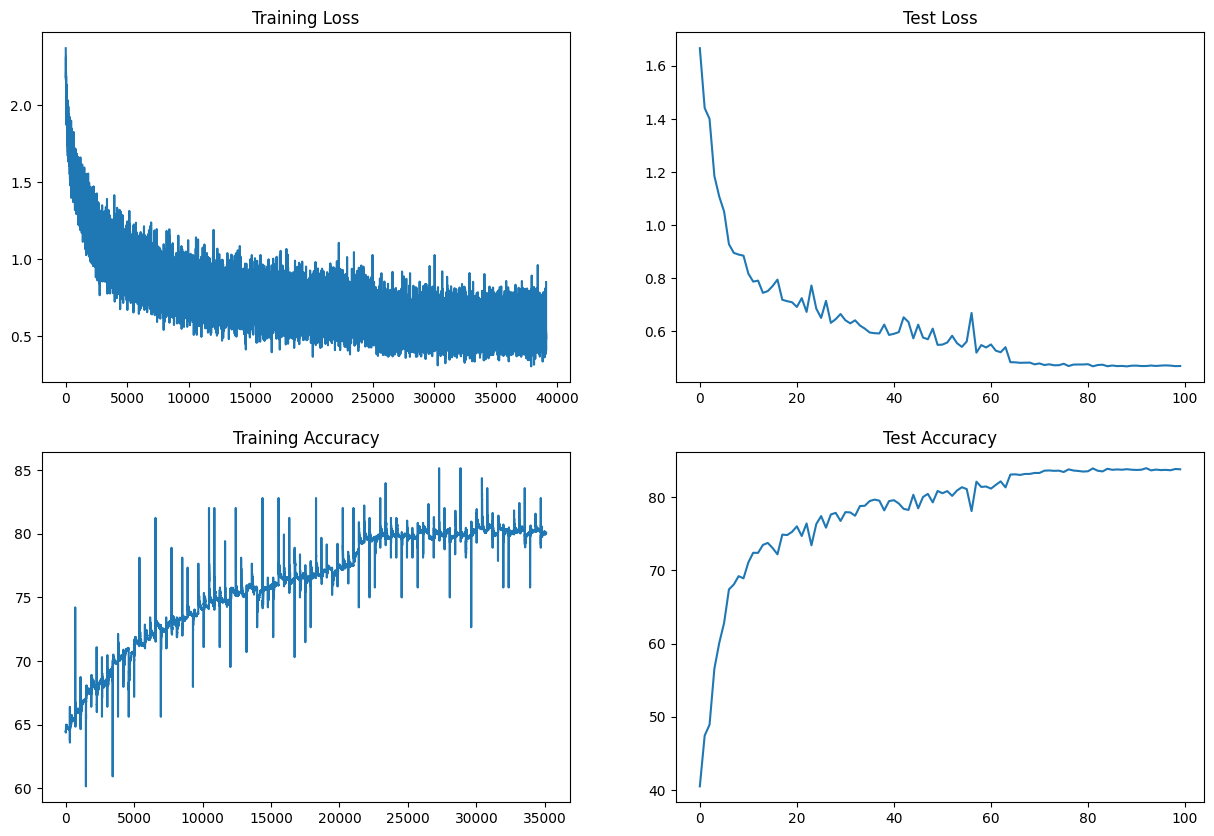

In [6]:
import matplotlib.pyplot as plt
from utils import plt_fig
plt_fig()

In [7]:
from visualize import show_misclassified_images, plt_misclassified_images

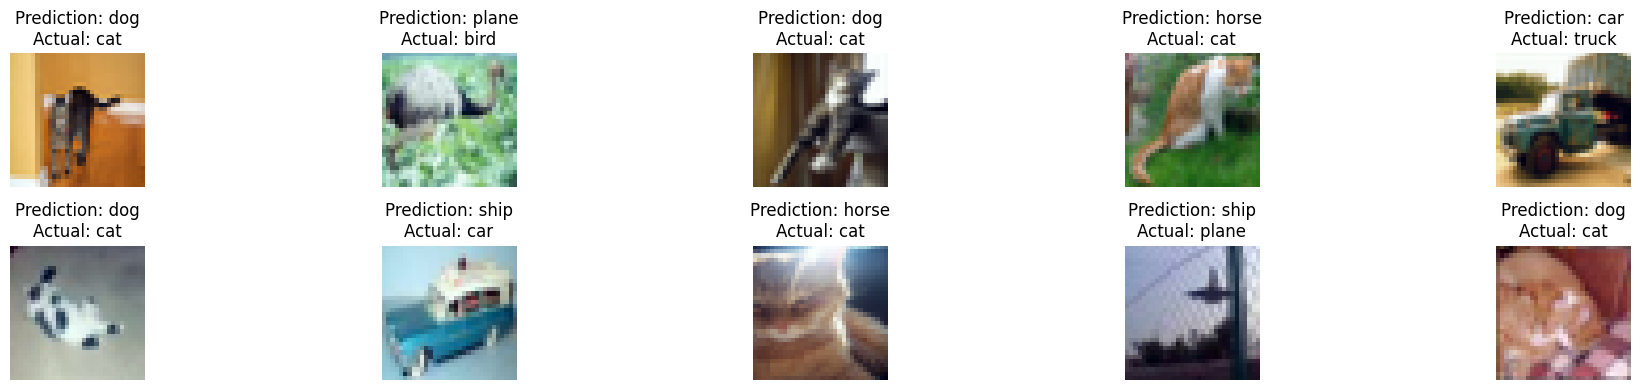

In [8]:
misclass_imgs, misclass_targets, misclass_preds = show_misclassified_images(model, test_loader, config)
plt_misclassified_images(config, misclass_imgs, misclass_targets, misclass_preds)